<h1 align=center><font size = 5>SPE Europe Energy GeoHackathon</font></h1>

Society of Petroleum Engieers|  ERCE Equipoise | Geothermal Challenge  
:-------------------------:|:-------------------------:|:-------------------------:
<a href="https://www.spehackathon-eu.com"> <img src = "https://upload.wikimedia.org/wikipedia/en/thumb/4/42/Society_of_Petroleum_Engineers_Logo.svg/1200px-Society_of_Petroleum_Engineers_Logo.svg.png" width = 200 /> | <a href="https://www.erce.energy/"> <img src = "https://energycouncil.com/wp-content/uploads/ERCE.png" width = 200/> | <img src = "https://solutions.vallourec.com/-/media/Solutions-img/Low-Carbon-Energy/Medias/Geothermal-energy/Header-Corner_Geothermal.ashx" width = 200/>

<h1 align=center><font size = 4> Team ERCE - Munish Kumar, Kanna Swaminathan & Ivan Maulana </font></h1>
<h1 align=center><font size = 3> 2021 </font></h1>

We now use the results of the multiple DART runs to build a machine learning based solution, using a multilinear regression. The input data set is split into train-test, and the model is built on the train set. We verify teh results of the model on the test set

Import the required packages:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import warnings
warnings.filterwarnings('ignore')

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics

Data loading:

In [2]:
df = pd.read_csv("DARTS output.csv")
df.head()

,P01_Rate,I01_Rate,P02_Rate,I02_Rate,P03_Rate,I03_Rate,P04_Rate,E03_Rate,P05_Rate,E02_Rate,...,E05_Y,P08_Y,E01_Y,P09_Y,E06_Y,P10_Y,I10_Y,NPV,Power,LCOH
0,-350,350,-315,315,-350,350,-350,350,-350,350,...,152,65,70,170,170,86,70,2315.085403,149.970882,1.40
1,-350,350,-315,315,-350,350,-500,500,-350,350,...,152,65,70,170,170,86,70,2460.667798,158.453752,1.32
2,-350,350,-315,315,-350,350,-500,500,-350,350,...,152,65,70,170,170,86,70,2494.698990,164.962886,1.32
3,-350,350,-315,315,-350,350,-500,500,-350,350,...,152,65,70,170,170,86,70,2535.085614,159.006140,1.27
4,-350,350,-315,315,-350,350,-500,500,-350,350,...,152,65,70,170,170,86,70,2545.716731,163.208926,1.29


In [3]:
#create a relationship between NPV and power
X = df.iloc[:, 61:62].values
y = df.iloc[:, 60].values
poly_reg = PolynomialFeatures(degree=3)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

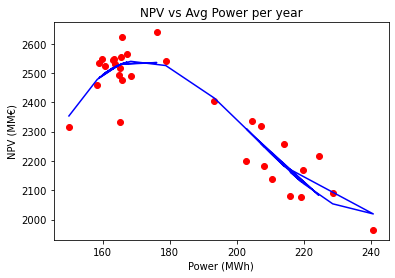

In [4]:
def viz_polymonial():
    plt.scatter(X, y, color='red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='blue')
    plt.title('NPV vs Avg Power per year')
    plt.xlabel('Power (MWh)')
    plt.ylabel('NPV (MM€)')
    plt.show()
    return
viz_polymonial()

In [5]:
pol_reg.predict(poly_reg.fit_transform([[180]]))

array([2520.02351482])

### Normalise dataset

The following functions will be used to normalize the data set

In [6]:
#Min-max normalisation of flow rates
def flow_norm(x):
    return (x + 1000) / 2000

df.iloc[:,0:20] = df.iloc[:,0:20].apply(flow_norm)

print(df.min()[0:20].head())
print(df.max()[0:20].head())

P01_Rate    0.3250
I01_Rate    0.3250
P02_Rate    0.3425
I02_Rate    0.3425
P03_Rate    0.3250
dtype: float64
P01_Rate    0.6750
I01_Rate    0.6750
P02_Rate    0.6575
I02_Rate    0.6575
P03_Rate    0.6750
dtype: float64


In [7]:
#Min-max normalisation of x-coord
def x_norm(x):
    return x / 230

df.iloc[:,20:40] = df.iloc[:,20:40].apply(x_norm)

print(df.min()[20:40].head())
print(df.max()[20:40].head())

P01_X    0.713043
I01_X    0.826087
P02_X    0.704348
I02_X    0.591304
P03_X    0.582609
dtype: float64
P01_X    0.713043
I01_X    0.826087
P02_X    0.704348
I02_X    0.591304
P03_X    0.582609
dtype: float64


In [8]:
#Min-max normalisation of y-coord
def y_norm(y):
    return y / 206

df.iloc[:,40:60] = df.iloc[:,40:60].apply(y_norm)

print(df.min()[40:60].head())
print(df.max()[40:60].head())

P01_Y    0.533981
I01_Y    0.485437
P02_Y    0.422330
I02_Y    0.364078
P03_Y    0.558252
dtype: float64
P01_Y    0.533981
I01_Y    0.485437
P02_Y    0.422330
I02_Y    0.364078
P03_Y    0.558252
dtype: float64


In [9]:
df2 = df.drop(['NPV', 'LCOH'], axis=1)
df2.head()

,P01_Rate,I01_Rate,P02_Rate,I02_Rate,P03_Rate,I03_Rate,P04_Rate,E03_Rate,P05_Rate,E02_Rate,...,E04_Y,P07_Y,E05_Y,P08_Y,E01_Y,P09_Y,E06_Y,P10_Y,I10_Y,Power
0,0.325,0.675,0.3425,0.6575,0.325,0.675,0.325,0.675,0.325,0.675,...,0.485437,0.776699,0.737864,0.315534,0.339806,0.825243,0.825243,0.417476,0.339806,149.970882
1,0.325,0.675,0.3425,0.6575,0.325,0.675,0.250,0.750,0.325,0.675,...,0.485437,0.776699,0.737864,0.315534,0.339806,0.825243,0.825243,0.417476,0.339806,158.453752
2,0.325,0.675,0.3425,0.6575,0.325,0.675,0.250,0.750,0.325,0.675,...,0.485437,0.776699,0.737864,0.315534,0.339806,0.825243,0.825243,0.417476,0.339806,164.962886
3,0.325,0.675,0.3425,0.6575,0.325,0.675,0.250,0.750,0.325,0.675,...,0.485437,0.776699,0.737864,0.315534,0.339806,0.825243,0.825243,0.417476,0.339806,159.006140
4,0.325,0.675,0.3425,0.6575,0.325,0.675,0.250,0.750,0.325,0.675,...,0.485437,0.776699,0.737864,0.315534,0.339806,0.825243,0.825243,0.417476,0.339806,163.208926


Splitting data into training and test:

In [10]:
df_train, df_test = train_test_split(df2, test_size = 0.3, random_state = 308)

print(df_train.shape)
print(df_test.shape)

print("-----------------------------")
df2.head()

(21, 61)
(10, 61)
-----------------------------


,P01_Rate,I01_Rate,P02_Rate,I02_Rate,P03_Rate,I03_Rate,P04_Rate,E03_Rate,P05_Rate,E02_Rate,...,E04_Y,P07_Y,E05_Y,P08_Y,E01_Y,P09_Y,E06_Y,P10_Y,I10_Y,Power
0,0.325,0.675,0.3425,0.6575,0.325,0.675,0.325,0.675,0.325,0.675,...,0.485437,0.776699,0.737864,0.315534,0.339806,0.825243,0.825243,0.417476,0.339806,149.970882
1,0.325,0.675,0.3425,0.6575,0.325,0.675,0.250,0.750,0.325,0.675,...,0.485437,0.776699,0.737864,0.315534,0.339806,0.825243,0.825243,0.417476,0.339806,158.453752
2,0.325,0.675,0.3425,0.6575,0.325,0.675,0.250,0.750,0.325,0.675,...,0.485437,0.776699,0.737864,0.315534,0.339806,0.825243,0.825243,0.417476,0.339806,164.962886
3,0.325,0.675,0.3425,0.6575,0.325,0.675,0.250,0.750,0.325,0.675,...,0.485437,0.776699,0.737864,0.315534,0.339806,0.825243,0.825243,0.417476,0.339806,159.006140
4,0.325,0.675,0.3425,0.6575,0.325,0.675,0.250,0.750,0.325,0.675,...,0.485437,0.776699,0.737864,0.315534,0.339806,0.825243,0.825243,0.417476,0.339806,163.208926


Training linear regression models:

In [11]:
# For the linear regression, we test the effect of regularisation on the output
# The regularisation will penalise the model to prevent overfitting

#With L2 (ridge) regularisation
df_ridge_reg = Ridge(max_iter=1000, tol=0.01)
train_df_ridge_reg = df_ridge_reg.fit(df_train.drop('Power', axis=1), df_train['Power'])

#With L1 (lasso) regularisation
df_lasso_reg = Lasso(max_iter=1000, tol=0.01)
train_df_lasso_reg = df_lasso_reg.fit(df_train.drop('Power', axis=1), df_train['Power'])

Using the regression models to predict values:

In [12]:
test_df_ridge_pred = df_ridge_reg.predict(df_test.drop('Power', axis=1))
test_df_lasso_pred = df_lasso_reg.predict(df_test.drop('Power', axis=1))

print("Actual Output:", df_test['Power'].tolist())
print("----------------------------------")
print("Output from Ridge:", test_df_ridge_pred)
print("----------------------------------")
print("Output from Lasso:", test_df_lasso_pred)
print("----------------------------------")

Actual Output: [167.2688408, 163.284755, 202.9717716, 193.3985786, 210.4562877, 163.2089265, 219.9905105, 216.0523285, 159.0061397, 160.7618191]
----------------------------------
Output from Ridge: [168.65283192 166.9364583  214.03355612 176.23226516 213.90580263
 166.78879237 215.27669401 214.10187966 166.17802944 168.05855287]
----------------------------------
Output from Lasso: [167.44861469 167.44861469 212.37855509 176.41052552 212.37855509
 167.44861469 212.37855509 212.37855509 167.44861469 167.44861469]
----------------------------------


Evaluating models using a set of metrics:

In [13]:
#Calculating MAE, RMSE, and R-squared for both models

df_ridge_mae = metrics.mean_absolute_error(df_test['Power'], test_df_ridge_pred)
df_ridge_rmse = sqrt(metrics.mean_squared_error(df_test['Power'], test_df_ridge_pred))
df_ridge_r2 = metrics.r2_score(df_test['Power'], test_df_ridge_pred)

df_lasso_mae = metrics.mean_absolute_error(df_test['Power'], test_df_lasso_pred)
df_lasso_rmse = sqrt(metrics.mean_squared_error(df_test['Power'], test_df_lasso_pred))
df_lasso_r2 = metrics.r2_score(df_test['Power'], test_df_lasso_pred)

df_eval = pd.DataFrame({"Ridge":{"MAE":df_ridge_mae, "RMSE":df_ridge_rmse,
                                    "R2":df_ridge_r2},
                           "Lasso":{"MAE":df_lasso_mae, "RMSE":df_lasso_mae,
                                    "R2":df_lasso_r2}
                          })

print(df_eval)

         Ridge     Lasso
MAE   6.142606  6.331543
RMSE  7.666244  6.331543
R2    0.897789  0.895035


### We observe that the prediction on the test set is highly accurate, with >80% accuracy.

#### We now apply the model in a blind test

-------------------------------

Insert new validation data set never before used in the training and testing of the model

In [14]:
df180 = pd.read_csv("DARTS output_test_180.csv")

In [15]:
# Normalize the dataset
df180.iloc[:,0:20] = df180.iloc[:,0:20].apply(flow_norm)
df180.iloc[:,20:40] = df180.iloc[:,20:40].apply(x_norm)
df180.iloc[:,40:60] = df180.iloc[:,40:60].apply(y_norm)

In [16]:
df180_nopower = df180.drop(['Power'], axis=1)
df180_nopower.head()

,P01_Rate,I01_Rate,P02_Rate,I02_Rate,P03_Rate,I03_Rate,P04_Rate,E03_Rate,P05_Rate,E02_Rate,...,P06_Y,E04_Y,P07_Y,E05_Y,P08_Y,E01_Y,P09_Y,E06_Y,P10_Y,I10_Y
0,0.3425,0.6575,0.35825,0.64175,0.3425,0.6575,0.185,0.815,0.3425,0.6575,...,0.402913,0.485437,0.776699,0.737864,0.315534,0.339806,0.825243,0.825243,0.082524,0.218447


Run various scenarios by changing the injection rate so that the demand capacity is met

In [17]:
a = 1
b = 0.85
c = 0.8

df180_nopower00 = df180_nopower.copy()
df180_nopower00.iloc[:,0:20] = df180_nopower00.iloc[:,0:20].multiply(a)

df180_nopower01 = df180_nopower.copy()
df180_nopower01.iloc[:,0:20] = df180_nopower01.iloc[:,0:20].multiply(b)

df180_nopower02 = df180_nopower.copy()
df180_nopower02.iloc[:,0:20] = df180_nopower02.iloc[:,0:20].multiply(c)

In [18]:
#Predict for all 
y1 = df_ridge_reg.predict(df180_nopower00)
y2 = df_lasso_reg.predict(df180_nopower00)

print(y1)
print(y2)

[175.53607254]
[171.14040843]


In [19]:
y3 = df_ridge_reg.predict(df180_nopower01)
y4 = df_lasso_reg.predict(df180_nopower01)

print(y3)
print(y4)

[180.68393688]
[178.27039887]


In [20]:
y5 = df_ridge_reg.predict(df180_nopower02)
y6 = df_lasso_reg.predict(df180_nopower02)

print(y5)
print(y6)

[182.39989167]
[180.64706235]


#### From the above, varying the rate by 15-20% would allow for demand capacity exactly to be met.